### Preparando o dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/content/dados_sinistros_python.xlsx', sheet_name = 'sinistros_pagos_meses')
df1 = pd.read_excel('/content/dados_sinistros_python.xlsx', sheet_name = 'codigos')

In [3]:
df.head()

,entNome,cnpj,id_sinistro,mesocorrencia,DataAviso,DataPagamento,DeltaAvisoPagamento,valor,tipopagamento
0,AIG SEGUROS BRASIL SA,33040981000150,118,201712,1/2/2018,1/1/2019,334,11469.60,Total
1,AIG SEGUROS BRASIL SA,33040981000150,118,201807,1/7/2018,1/1/2019,184,41205.89,Total
2,AIG SEGUROS BRASIL SA,33040981000150,118,201809,1/11/2018,1/1/2019,61,17754.35,Total
3,AIG SEGUROS BRASIL SA,33040981000150,118,201809,1/12/2018,1/1/2019,31,5367.15,Total
4,AIG SEGUROS BRASIL SA,33040981000150,118,201810,1/10/2018,1/1/2019,92,168715.08,Total


In [4]:
df1.head()

,id_sinistro,id_grupo,nome_grupo,id_ramo,nome_ramo
0,112,1,Patrimonial,12,Assistência – Bens em Geral
1,114,1,Patrimonial,14,Compreensivo Residencial
2,116,1,Patrimonial,16,Compreensivo Condomínio
3,118,1,Patrimonial,18,Compreensivo Empresarial
4,141,1,Patrimonial,41,Lucros Cessantes


Juntando as duas bases:

In [5]:
sinistros_pagos = pd.merge(df, df1, on = 'id_sinistro')
sinistros_pagos.head()

,entNome,cnpj,id_sinistro,mesocorrencia,DataAviso,DataPagamento,DeltaAvisoPagamento,valor,tipopagamento,id_grupo,nome_grupo,id_ramo,nome_ramo
0,AIG SEGUROS BRASIL SA,33040981000150,118,201712,1/2/2018,1/1/2019,334,11469.60,Total,1,Patrimonial,18,Compreensivo Empresarial
1,AIG SEGUROS BRASIL SA,33040981000150,118,201807,1/7/2018,1/1/2019,184,41205.89,Total,1,Patrimonial,18,Compreensivo Empresarial
2,AIG SEGUROS BRASIL SA,33040981000150,118,201809,1/11/2018,1/1/2019,61,17754.35,Total,1,Patrimonial,18,Compreensivo Empresarial
3,AIG SEGUROS BRASIL SA,33040981000150,118,201809,1/12/2018,1/1/2019,31,5367.15,Total,1,Patrimonial,18,Compreensivo Empresarial
4,AIG SEGUROS BRASIL SA,33040981000150,118,201810,1/10/2018,1/1/2019,92,168715.08,Total,1,Patrimonial,18,Compreensivo Empresarial


In [6]:
sinistros_pagos.nome_grupo.unique()

array(['Patrimonial', 'Responsabilidades', 'Automóvel', 'Transportes',
       'Riscos Financeiros', 'Pessoas Coletivo', 'Pessoas Individual',
       'Marítimos', 'Pessoas', 'Microsseguros', 'Aeronáuticos',
       'Habitacional', 'Rural', 'Prev Trad / PGBL', 'Riscos Especiais',
       'Crédito', 'Cascos', 'Petróleo'], dtype=object)

Colocando a data no formato certo

In [7]:
sinistros_pagos.DataPagamento = pd.to_datetime(sinistros_pagos.DataPagamento, format="%d/%m/%Y")
sinistros_pagos['MesPagamento'] = sinistros_pagos['DataPagamento'].dt.month

In [8]:
sinistros_pagos['nome_mes'] = sinistros_pagos['MesPagamento'].apply(lambda x: 'Janeiro' if x == 1 else ('Fevereiro' if x ==2 else ('Março' if x ==3 else ('Abril' if x ==4 else ('Maio' if x ==4 else('Junho' if x ==5 else('Julho' if x ==6 else('Agosto' if x ==7 else('Setembro' if x ==8 else('Outubro' if x ==10 else('Novembro' if x ==11 else('Dezembro'))))))))))))

In [9]:
sinistros_pagos[['MesPagamento','nome_mes']].tail()

,MesPagamento,nome_mes
403711,7,Agosto
403712,10,Outubro
403713,8,Setembro
403714,8,Setembro
403715,9,Dezembro


## Relatório de Sinistros: Tópicos

### Métricas por empresa com groupby

In [10]:
# gerando as métricas por empresa com groupby
empresas_soma = sinistros_pagos.groupby('entNome')['valor'].sum()
empresas_soma= pd.DataFrame(empresas_soma)

empresas_contagem= sinistros_pagos.groupby('entNome')['valor'].count()
empresas_contagem= pd.DataFrame(empresas_contagem)

empresas_mediana = sinistros_pagos.groupby('entNome')['DeltaAvisoPagamento'].median().astype(int)
empresas_mediana= pd.DataFrame(empresas_mediana)

# Juntando as tabelas com as métricas agrupadas por empresa
empresas_tab1 = pd.merge(empresas_soma, empresas_contagem, left_index = True, right_index = True)
top_empresas= pd.merge(empresas_tab1, empresas_mediana,left_index = True, right_index = True)

#ordenando a tabela
top_empresas.sort_values('valor_x', ascending=False, inplace=True)

# separando as empresas do índice
top_empresas['posicao'] = range(1,len(top_empresas)+1)
top_empresas['Empresa'] = top_empresas.index
top_empresas.set_index('posicao', inplace= True)

#Renomeando as colunas
top_empresas.rename(columns = {'valor_x':'valor_pagamento', 'valor_y':'n_de_sinistos','DeltaAvisoPagamento':'deltaT_pagamento'}, inplace= True)
#organizando a tabela
top_empresas = top_empresas[['Empresa','valor_pagamento','n_de_sinistos','deltaT_pagamento']]

#visualizando os 10 primeiros
top_empresas.head(10)

,Empresa,valor_pagamento,n_de_sinistos,deltaT_pagamento
posicao,,,,
1,PORTO SEGURO COMPANHIA DE SEGUROS GERAIS,4.766017e+09,22264,122
2,MAPFRE SEGUROS GERAIS SA,3.820357e+09,27861,214
3,BRADESCO AUTO/RE COMPANHIA DE SEGUROS,3.353248e+09,17921,242
4,BRASILSEG COMPANHIA DE SEGUROS,2.653035e+09,12355,153
5,TOKIO MARINE SEGURADORA SA,2.616952e+09,16646,122
6,TRADITIO COMPANHIA DE SEGUROS,2.441455e+09,6393,184
7,HDI SEGUROS SA,2.328213e+09,8401,184
8,AZUL COMPANHIA DE SEGUROS GERAIS,2.177679e+09,5808,243
9,LIBERTY SEGUROS SA,2.079469e+09,8395,92


### Métricas por Grupo e Ramo de Sinistro com groupby

In [11]:
# gerando as métricas por Ramo de Sinistro com groupby
grupo_soma = sinistros_pagos.groupby('nome_grupo')['valor'].sum()/1000000000
grupo_soma = grupo_soma.round(2)
grupo_soma= pd.DataFrame(grupo_soma)

grupo_contagem= sinistros_pagos.groupby('nome_grupo')['valor'].count()/1000
grupo_contagem= grupo_contagem.round(2)
grupo_contagem= pd.DataFrame(grupo_contagem)

grupo_mediana = sinistros_pagos.groupby('nome_grupo')['DeltaAvisoPagamento'].median().astype(int)
grupo_mediana= pd.DataFrame(grupo_mediana)

# Juntando as tabelas com as métricas agrupadas por empresa
grupo_tab1 = pd.merge(grupo_soma, grupo_contagem, left_index = True, right_index = True)
top_grupo= pd.merge(grupo_tab1, grupo_mediana,left_index = True, right_index = True)

#ordenando a tabela
top_grupo.sort_values('valor_x', ascending=False, inplace=True)

# separando as grupo do índice
top_grupo['posicao'] = range(1,len(top_grupo)+1)
top_grupo['Grupo de Sinistro'] = top_grupo.index
top_grupo.set_index('posicao', inplace= True)

#Renomeando as colunas
top_grupo.rename(columns = {'valor_x':'Valor pagamento (Bi R$)', 
                            'valor_y':'Nº de Sinistos (R$ Mil)',
                            'DeltaAvisoPagamento':'Delta T Pagamento'}, 
                            inplace= True)
#organizando a tabela
top_grupo = top_grupo[['Grupo de Sinistro','Valor pagamento (Bi R$)',
                       'Nº de Sinistos (R$ Mil)','Delta T Pagamento']]

#visualizando os 10 primeiros
top_grupo.head(10)

,Grupo de Sinistro,Valor pagamento (Bi R$),Nº de Sinistos (R$ Mil),Delta T Pagamento
posicao,,,,
1,Automóvel,23.30,84.63,212
2,Patrimonial,7.00,57.56,121
3,Pessoas,5.21,57.79,122
4,Pessoas Coletivo,3.10,83.50,89
5,Rural,2.93,9.98,92
6,Transportes,1.76,22.76,92
7,Riscos Financeiros,1.55,28.09,396
8,Responsabilidades,1.07,9.59,153
9,Habitacional,0.95,8.94,122


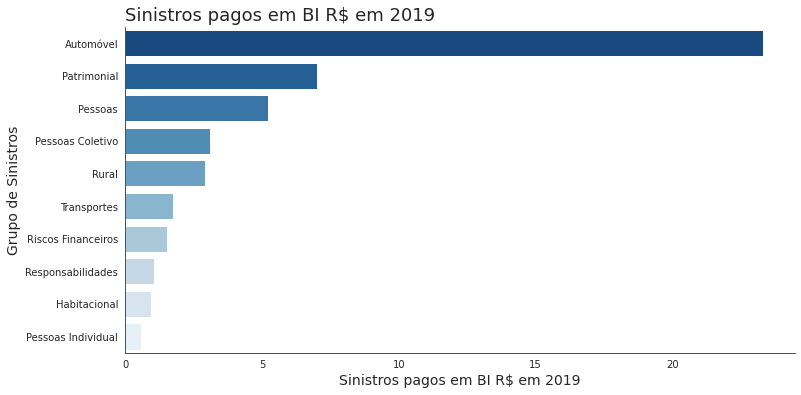

In [12]:
plt.figure(figsize= (12,6)) 
sns.set_palette('Accent')
sns.set_style('white')
ax= sns.barplot(x='Valor pagamento (Bi R$)', y="Grupo de Sinistro",data=top_grupo.head(10), palette='Blues_r')
#ax.figure.set_size_inches(12,6)
ax.set_title('Sinistros pagos em BI R$ em 2019', loc='left', fontsize=18)
ax.set_xlabel('Sinistros pagos em BI R$ em 2019', fontsize= 14)
ax.set_ylabel('Grupo de Sinistros', fontsize=14)
sns.despine()
ax= ax

### Gerando o detalhamento do Grupo pelo Ramo do Sinistro com groupby

In [13]:
# Gerando o detalhamento do Grupo pelo Ramo do Sinistro com groupby

valor = input('Digite o Grupo que deseja o Detalhamento: ')
filtro_grupo = sinistros_pagos[sinistros_pagos['nome_grupo'] == valor].copy()
ramo_soma = filtro_grupo .groupby('nome_ramo')['valor'].sum()/1000000000
ramo_soma = ramo_soma.round(2)
ramo_soma= pd.DataFrame(ramo_soma)

ramo_contagem= filtro_grupo .groupby('nome_ramo')['valor'].count()/1000
ramo_contagem= ramo_contagem.round(2)
ramo_contagem= pd.DataFrame(ramo_contagem)

ramo_mediana = filtro_grupo .groupby('nome_ramo')['DeltaAvisoPagamento'].median().astype(int)
ramo_mediana= pd.DataFrame(ramo_mediana)

# Juntando as tabelas com as métricas agrupadas por empresa
ramo_tab1 = pd.merge(ramo_soma, ramo_contagem, left_index = True, right_index = True)
top_ramo= pd.merge(ramo_tab1, ramo_mediana,left_index = True, right_index = True)

#ordenando a tabela
top_ramo.sort_values('valor_x', ascending=False, inplace=True)

# separando as ramo do índice
top_ramo['posicao'] = range(1,len(top_ramo)+1)
top_ramo['Ramo do Sinistro'] = top_ramo.index
top_ramo.set_index('posicao', inplace= True)

#Renomeando as colunas
top_ramo.rename(columns = {'valor_x':'Valor pagamento (Bi R$)', 'valor_y':'Nº de Sinistos (R$ Mil)','DeltaAvisoPagamento':'Delta T Pagamento'}, inplace= True)
#organizando a tabela
top_ramo = top_ramo[['Ramo do Sinistro','Valor pagamento (Bi R$)','Nº de Sinistos (R$ Mil)','Delta T Pagamento']]

#visualizando os 10 primeiros
top_ramo.head(10)

Digite o Grupo que deseja o Detalhamento: Pessoas Coletivo


,Ramo do Sinistro,Valor pagamento (Bi R$),Nº de Sinistos (R$ Mil),Delta T Pagamento
posicao,,,,
1,Prestamista (exceto Habitacional e Rural),1.56,32.05,92
2,Acidentes Pessoais,0.82,25.37,92
3,Dotal Misto,0.21,0.83,31
4,Eventos Aleatórios,0.21,8.09,61
5,Doenças Graves ou Doença Terminal,0.12,1.95,31
6,Funeral,0.11,8.77,61
7,Viagem,0.03,2.18,122
8,Educacional,0.02,1.97,91
9,Desemprego/Perda de Renda,0.01,2.27,61


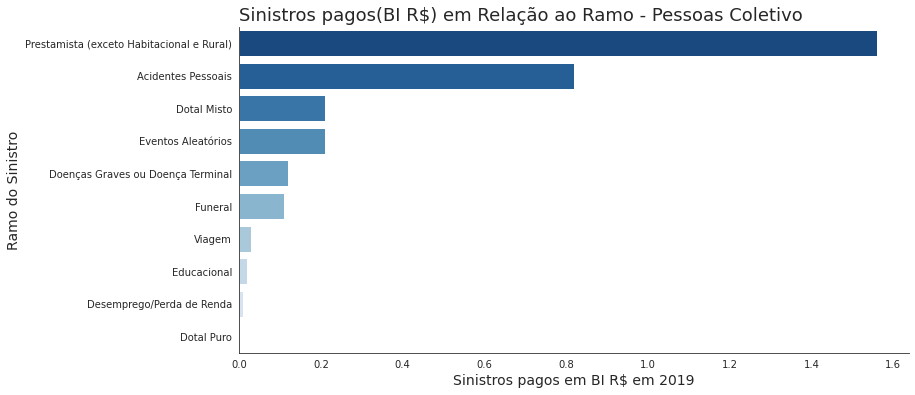

In [14]:
plt.figure(figsize= (12,6)) 
sns.set_palette('Accent')
sns.set_style('white')
ax= sns.barplot(x='Valor pagamento (Bi R$)', y="Ramo do Sinistro", data=top_ramo.head(10), palette= "Blues_r")
#ax.figure.set_size_inches(12,6)
ax.set_title(f'Sinistros pagos(BI R$) em Relação ao Ramo - {valor}', loc='left', fontsize=18)
ax.set_xlabel('Sinistros pagos em BI R$ em 2019', fontsize= 14)
ax.set_ylabel('Ramo do Sinistro', fontsize=14)
sns.despine()
graf_ramo= ax

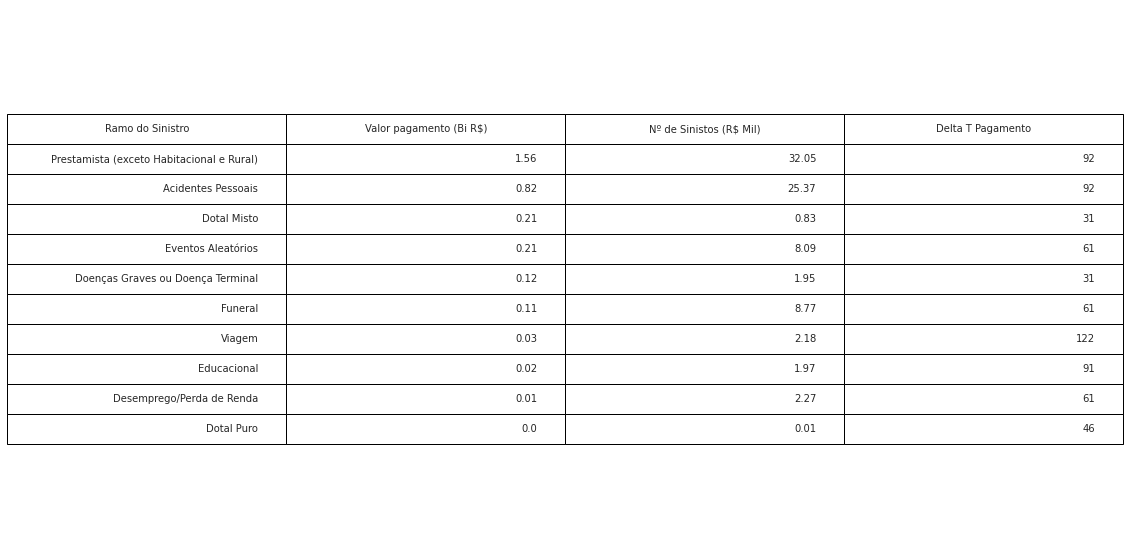

In [15]:
fig, ax =plt.subplots(1,1)

colors = [["#1ac3f5"],["#1ac3f5"],["#1ac3f5"]]
df = top_ramo.head(10).copy()
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values,
        colLabels=df.columns, loc = 'center')
ax.figure.set_size_inches(20,10)

plt.show()

### Serie Temporal: Valor x Mês

In [16]:
# Agrupando os dados por Mês
serie_valor = sinistros_pagos.groupby('MesPagamento')['valor'].sum()
serie_valor= pd.DataFrame(serie_valor)
serie_valor['index'] = range(0,len(serie_valor))
serie_valor['mes_pagamento'] = serie_valor.index
serie_valor.set_index('index', inplace=True)


# Atribuindo nome aos meses
serie_valor['nome_mes'] = serie_valor['mes_pagamento'].apply(lambda x: 
                'Janeiro'if x == 1 else 
                ('Fevereiro' if x ==2 else 
                ('Março' if x ==3 else 
                ('Abril' if x ==4 else 
                ('Maio' if x ==5 else
                ('Junho' if x ==6 else
                ('Julho' if x ==7 else
                ('Agosto' if x ==8 else
                ('Setembro' if x ==9 else
                ('Outubro' if x ==10 else
                ('Novembro' if x ==11 else
                ('Dezembro'))))))))))))
serie_valor = serie_valor[['mes_pagamento', 'nome_mes', 'valor']]
serie_valor

,mes_pagamento,nome_mes,valor
index,,,
0,1,Janeiro,3.811217e+09
1,2,Fevereiro,3.509688e+09
2,3,Março,3.429304e+09
3,4,Abril,4.224908e+09
4,5,Maio,4.278948e+09
5,6,Junho,4.598256e+09
6,7,Julho,4.945330e+09
7,8,Agosto,4.346349e+09
8,9,Setembro,3.950240e+09


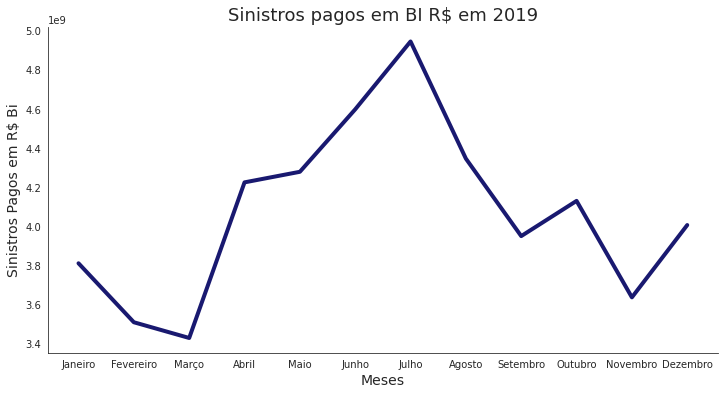

In [17]:
plt.figure(figsize= (12,6)) 
sns.set_palette('Accent')
sns.set_style('white')
ax= sns.lineplot(x='nome_mes', y="valor", data= serie_valor, linewidth = 4, color='midnightblue')
#ax.figure.set_size_inches(12,6)
ax.set_title('Sinistros pagos em BI R$ em 2019', loc='center', fontsize=18)
ax.set_xlabel('Meses', fontsize= 14)
ax.set_ylabel('Sinistros Pagos em R$ Bi', fontsize=14)
sns.despine()
ax= ax

### Tipo de Pagamento

In [18]:
tpag_valor = sinistros_pagos.groupby('tipopagamento')['valor'].sum()
tpag_valor= pd.DataFrame(tpag_valor)
tpag_valor['index'] = range(0,len(tpag_valor))
tpag_valor['tipo_de_pagamento'] = tpag_valor.index
tpag_valor.set_index('index', inplace=True)
tpag_valor

,valor,tipo_de_pagamento
index,,
0,1.234237e+10,Parcial
1,3.652581e+10,Total


Text(0.5, 1.0, 'Tipo de Pagamento')

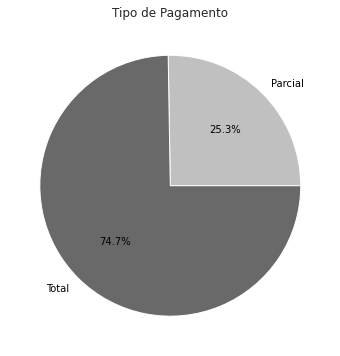

In [19]:
# Pizza
plt.figure(figsize= (12,6)) 
plt.pie(data = tpag_valor, x = 'valor', labels = 'tipo_de_pagamento', colors=['silver','dimgray'], autopct='%1.1f%%', textprops=dict(color="black"))
plt.title('Tipo de Pagamento')
